In [1]:
push!(LOAD_PATH, pwd() * "/my_module")
ENV["GKS_ENCODING"]="utf8"

"utf8"

In [2]:
using Revise
using Plots
using linear_prog_prob: LP_Prob, Standard, No_nonNegative, Equality
using linear_prog_prob: simplex, two_phase_simplex, convert_dual_problem

gr(fontfamily="IPAMincho")

Plots.GRBackend()

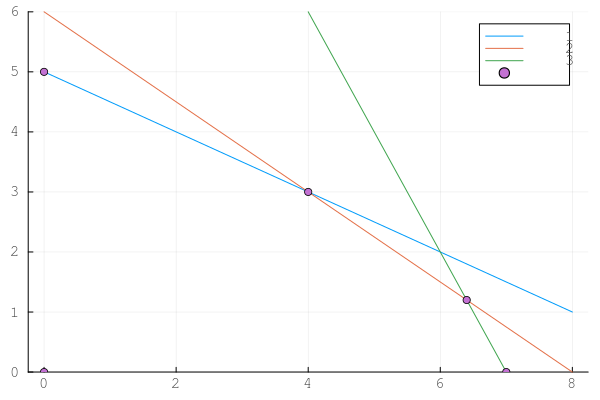

GKS: could not find font IPAMincho.ttf
GKS: glyph missing from current font: 21046
GKS: glyph missing from current font: 32004
GKS: glyph missing from current font: 26465
GKS: glyph missing from current font: 20214
GKS: glyph missing from current font: 21046
GKS: glyph missing from current font: 32004
GKS: glyph missing from current font: 26465
GKS: glyph missing from current font: 20214
GKS: glyph missing from current font: 21046
GKS: glyph missing from current font: 32004
GKS: glyph missing from current font: 26465
GKS: glyph missing from current font: 20214
GKS: glyph missing from current font: 21046
GKS: glyph missing from current font: 32004
GKS: glyph missing from current font: 26465
GKS: glyph missing from current font: 20214
GKS: glyph missing from current font: 21046
GKS: glyph missing from current font: 32004
GKS: glyph missing from current font: 26465
GKS: glyph missing from current font: 20214
GKS: glyph missing from current font: 21046
GKS: glyph missing from current font:

In [3]:
x_data = 0:1:8
plt = plot()
plot!(plt, x_data, 5  .- x_data ./ 2,            label="制約条件1", ylim=(0,6))
plot!(plt, x_data, 6  .- x_data .* (3 / 4),      label="制約条件2", ylim=(0,6))
plot!(plt, x_data, 14 .- x_data .* 2,            label="制約条件3", ylim=(0,6))
plot!(plt, [0, 0, 4, 6.4, 7], [0, 5, 3, 1.2, 0], label="解の候補",  st=:scatter)

In [4]:
object       = [5 8]
conditions_A = [1 2; 3 4; 2 1]
conditions_b = [10, 24, 14]

simplex(object, conditions_A, conditions_b)

収束しました
結果：2回の反復試行を行いました


([4.0, 3.0, 0.0, 0.0, 3.0], 44.0)

In [5]:
object       = [1 2]
conditions_A = [1 1; 1 3; 2 1]
conditions_b = [6, 12, 10]

simplex(object, conditions_A, conditions_b)

収束しました
結果：2回の反復試行を行いました


([2.9999999999999996, 3.0, 0.0, 0.0, 1.0000000000000018], 9.0)

In [6]:
object       = [2 1]
conditions_A = [1 -2; -1 1]
conditions_b = [4, 2]

simplex(object, conditions_A, conditions_b)

収束に失敗しました
設定された問題は非有界です
結果：1回の反復試行を行いました


([4.0, 0.0, 0.0, 6.0], 8.0)

In [7]:
object       = [3 2]
conditions_A = [2 1; 1 1]
conditions_b = [6, 3]

simplex(object, conditions_A, conditions_b)

収束しました
結果：2回の反復試行を行いました


([3.0, 0.0, 0.0, 0.0], 9.0)

In [8]:
num          = 15
object       = [BigInt(10)^idx  for idx in (num-1):-1:0]'
conditions_A = [(if idx2 < idx1 2*BigInt(10)^(idx1 - idx2) elseif idx2 == idx1 1 else 0 end) for idx1 in 1:num, idx2 in 1:num]
conditions_b = [BigInt(100)^idx for idx in 0:(num-1)]


object       = BigFloat.(object)
conditions_A = BigFloat.(conditions_A)
conditions_b = BigFloat.(conditions_b)

println("理論上、", BigInt(2)^num - 1, "回の反復試行を必要とします")
x, z = simplex(object, conditions_A, conditions_b)

display(x)
display(z)

理論上、32767回の反復試行を必要とします
収束しました
結果：32767回の反復試行を行いました


30-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 1.0e12
 1.0e14
 1.0e16
 1.0e18
 1.0e20
 1.0e22
 1.0e24
 1.0e26
 0.0

1.0e+28

In [9]:
object       = [1 2]
conditions_A = [1 1; 1 3; -3 -2]
conditions_b = [6, 12, -6]

simplex(object, conditions_A, conditions_b)

収束に失敗しました
実行可能解を得られませんでした
基底ベクトル：[5, 4, 3] = [-6.0, 12.0, 6.0]
結果：0回の反復試行を行いました


([0.0, 0.0, 6.0, 12.0, -6.0], 0.0)

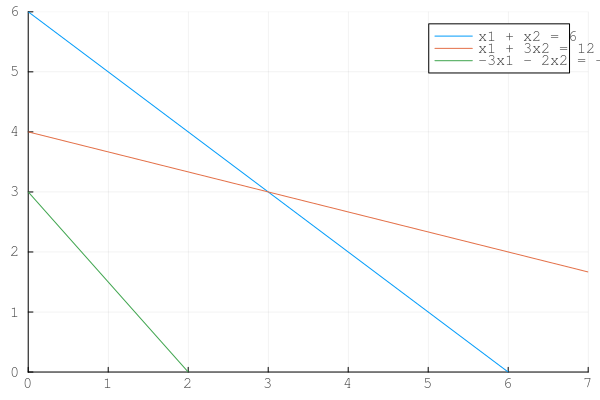

In [10]:
using Plots

# 制約条件のプロット
plot(x -> 6 - x, 0, 7, label="x1 + x2 = 6", xlims=(0, 7), ylims=(0, 6))
plot!(x -> (12 - x) / 3, 0, 7, label="x1 + 3x2 = 12", xlims=(0, 7), ylims=(0, 6))
plot!(x -> (-6 + 3x) / -2, 0, 7, label="-3x1 - 2x2 = -6", xlims=(0, 7), ylims=(0, 6))

In [11]:
object       = [1 2]
conditions_A = [1 1; 1 3; -3 -2]
conditions_b = [6, 12, -6]

two_phase_simplex(object, conditions_A, conditions_b)

収束しました
実行可能解を発見しました
非基底ベクトル：[5, 6, 2] = [0.0, 0.0, 0.0]
基底ベクトル：[4, 3, 1] = [10.0, 4.0, 2.0]
補助変数は 6 です
基数の初期値を設定しました：Set([5, 2])
単体法を実行します
収束しました
結果：3回の反復試行を行いました


([2.9999999999999996, 3.0], 9.0)

In [12]:
object       = [20 10]
conditions_A = [1 1; 3 1; 1 2]
conditions_b = [6, 12, 10]
format       = Equality

dual_object, dual_conditions_A, dual_conditions_b, dual_format = convert_dual_problem(object, conditions_A, conditions_b; format=format)
display(dual_object)
display(dual_conditions_A)
display(dual_conditions_b)
display(dual_format)
x, z = two_phase_simplex(dual_object, dual_conditions_A, dual_conditions_b; format=dual_format)
println(x, " ", z)
println("この問題の上界は ", -z, " です")
println()

dual_dual_object, dual_dual_conditions_A, dual_dual_conditions_b, dual_format = convert_dual_problem(dual_object, dual_conditions_A, dual_conditions_b; format=dual_format)
display(dual_dual_object)
display(dual_dual_conditions_A)
display(dual_dual_conditions_b)
display(dual_format)
two_phase_simplex(dual_dual_object, dual_dual_conditions_A, dual_dual_conditions_b; format=dual_format)

1×3 Matrix{Int64}:
 -6  -12  -10

2×3 Matrix{Int64}:
 -1  -3  -1
 -1  -1  -2

2-element Vector{Int64}:
 -20
 -10

No_nonNegative::LP_Prob = 1

収束しました
実行可能解を発見しました
非基底ベクトル：[5, 4, 6, 7, 9, 8, 1] = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
基底ベクトル：[2, 3] = [5.999999999999999, 2.0]
補助変数は 9 です
基数の初期値を設定しました：Set([5, 4, 6, 7, 8, 1])
単体法を実行します
収束に失敗しました
設定された問題は非有界です
結果：2回の反復試行を行いました
[30.0, 0.0, -10.0] -80.0
この問題の上界は 80.0 です

収束しました
実行可能解を得られませんでした
非基底ベクトル：[7, 8, 3] = [0.0, 0.0, 0.0]
基底ベクトル：[5, 4, 6, 2, 9, 1] = [0.5, 0.5, 0.5, 3.5, 0.25, 2.75]
補助変数は 9 です


1×2 Matrix{Int64}:
 20  10

3×2 Matrix{Int64}:
 1  1
 3  1
 1  2

3-element Vector{Int64}:
  6
 12
 10

Equality::LP_Prob = 2

In [13]:
object       = [5 8]
conditions_A = [1 2; 3 4; 2 1]
conditions_b = [10, 24, 11]

# simplex(object, conditions_A, conditions_b, non_Basic_Set=Set([3, 4]))
two_phase_simplex(object, conditions_A, conditions_b; format=No_nonNegative)

実行可能解を発見しました
単体法を実行します
収束しました
結果：2回の反復試行を行いました


([4.0, 3.0], 44.0)

In [17]:
# しっかり学ぶ数理最適化
# 演習問題2.1
object       = [8 14 11  4 12  7  4 13  9]
conditions_A = [1  1  1  0  0  0  0  0  0; 0 0 0 1 1 1 0 0 0; 0 0 0 0 0 0 1 1 1; 0 1 0 0 1 0 0 1 0; 0 0 1 0 0 1 0 0 1]
conditions_b = [480, 400, 230, 420, 250]

# simplex(object, conditions_A, conditions_b; format=Standard)
two_phase_simplex(object, conditions_A, conditions_b; format=Standard)

実行可能解を発見しました
単体法を実行します
収束しました
結果：6回の反復試行を行いました


([440.0, 0.0, 40.0, 0.0, 400.0, 0.0, 0.0, 20.0, 210.0], 10910.0)

In [23]:
# しっかり学ぶ数理最適化
# 演習問題2.2
object       = [4.83 4.83 4.83 4.83 4.96 5.85 6.45      0   0   0    0      0   0   0    0      0   0   0    0]
conditions_A = [   0    0    0    0   -1    0    0      1   1   1    1      0   0   0    0      0   0   0    0;
				   0    0    0    0    1    0    0     -1  -1  -1   -1      0   0   0    0      0   0   0    0;
				   0    0    0    0    0   -1    0      0   0   0    0      1   1   1    1      0   0   0    0;
				   0    0    0    0    0    1    0      0   0   0    0     -1  -1  -1   -1      0   0   0    0;
				   0    0    0    0    0    0   -1      0   0   0    0      0   0   0    0      1   1   1    1;
				   0    0    0    0    0    0    1      0   0   0    0      0   0   0    0     -1  -1  -1   -1;
				   0    0    0    0   80    0    0 -107.5 -93 -87 -108      0   0   0    0      0   0   0    0;
				   0    0    0    0   -7    0    0      5   8   4 20.5      0   0   0    0      0   0   0    0;
				   0    0    0    0    0   91    0      0   0   0    0 -107.5 -93 -87 -108      0   0   0    0;
				   0    0    0    0    0   -7    0      0   0   0    0      5   8   4 20.5      0   0   0    0;
				   0    0    0    0    0    0  100      0   0   0    0      0   0   0    0 -107.5 -93 -87 -108;
				   0    0    0    0    0    0   -7      0   0   0    0      0   0   0    0      5   8   4 20.5;
				   1    0    0    0    0    0    0      1   0   0    0      1   0   0    0      1   0   0    0;
				   0    1    0    0    0    0    0      0   1   0    0      0   1   0    0      0   1   0    0;
				   0    0    1    0    0    0    0      0   0   1    0      0   0   1    0      0   0   1    0;
				   0    0    0    1    0    0    0      0   0   0    1      0   0   0    1      0   0   0    1;
				]
conditions_b = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3200.0, 2652.0, 4081.0, 1300.0]

# simplex(object, conditions_A, conditions_b; format=Standard)
two_phase_simplex(object, conditions_A, conditions_b; format=Standard)

実行可能解を発見しました
単体法を実行します
収束しました
結果：6回の反復試行を行いました


true

In [25]:
# しっかり学ぶ数理最適化
# 演習問題2.3.1
object       = [-16 -2 3]
conditions_A = [
				-1  6  0;
				 0  3  7;
				 1  1  1;
				-1 -1 -1;
				]
conditions_b = [-4, -5, 10, -10]

# simplex(object, conditions_A, conditions_b; format=Standard)
two_phase_simplex(object, conditions_A, conditions_b; format=Standard)

収束しました
実行可能解を得られませんでした
非基底ベクトル：[5, 7, 2, 3] = [0.0, 0.0, 0.0, 0.0]
基底ベクトル：[4, 6, 8, 1] = [6.0, 10.0, 5.0, 5.0]
補助変数は 8 です


In [30]:
# しっかり学ぶ数理最適化
# 演習問題2.3.2
object       = [5 6 3 -6]
conditions_A = [
				 1  0 -1  0;
				-1  0  1  0;
				10  7  4 -7;
				-2  0 11  0;
				]
conditions_b = [10, 10, 50, -15]

# simplex(object, conditions_A, conditions_b; format=Standard)
two_phase_simplex(object, conditions_A, conditions_b; format=Standard)

収束しました
実行可能解を発見しました
非基底ベクトル：[7, 2, 9, 8, 3] = [0.0, 0.0, 0.0, 0.0, 0.0]
基底ベクトル：[5, 4, 6, 1] = [2.5, 3.5714285714285703, 17.5, 7.5]
補助変数は 9 です
基数の初期値を設定しました：Set([7, 2, 8, 3])
単体法を実行します
収束しました
結果：0回の反復試行を行いました


([7.5, 0.0, 0.0, 3.5714285714285703], 16.071428571428577)

In [34]:
# しっかり学ぶ数理最適化
# 演習問題2.4.1
object       = [4 8 10]
conditions_A = [
				 1  1  1;
				 3  4  6;
				 4  5  3;
				]
conditions_b = [20, 100, 100]

simplex(object, conditions_A, conditions_b; format=Standard)
# two_phase_simplex(object, conditions_A, conditions_b; format=Standard)

収束しました
結果：2回の反復試行を行いました


([0.0, 10.0, 10.0, 0.0, 0.0, 20.0], 180.0)

In [35]:
# しっかり学ぶ数理最適化
# 演習問題2.4.2
object       = [1 3 -1]
conditions_A = [
				 2  2 -1;
				 3 -2  1;
				 1 -3  1;
				]
conditions_b = [10, 10, 10]

simplex(object, conditions_A, conditions_b; format=Standard)
# two_phase_simplex(object, conditions_A, conditions_b; format=Standard)

収束に失敗しました
設定された問題は非有界です
結果：1回の反復試行を行いました


([0.0, 5.0, 0.0, 0.0, 20.0, 25.0], 15.0)

In [36]:
# しっかり学ぶ数理最適化
# 演習問題2.4.3
object       = [10 1]
conditions_A = [
				 1  0;
				20  1;
				]
conditions_b = [1, 100]

simplex(object, conditions_A, conditions_b; format=Standard)
# two_phase_simplex(object, conditions_A, conditions_b; format=Standard)

収束しました
結果：3回の反復試行を行いました


([0.0, 100.0, 1.0, 0.0], 100.0)

In [37]:
# しっかり学ぶ数理最適化
# 演習問題2.5.1
object       = [-2 -3 -1]
conditions_A = [
				-1 -4 -2;
				-3 -2  0;
				]
conditions_b = [-8, -6]

# simplex(object, conditions_A, conditions_b; format=Standard)
two_phase_simplex(object, conditions_A, conditions_b; format=Standard)

収束しました
実行可能解を発見しました
非基底ベクトル：[5, 4, 6, 3] = [0.0, 0.0, 0.0, 0.0]
基底ベクトル：[2, 1] = [1.7999999999999998, 0.8]
補助変数は 6 です
基数の初期値を設定しました：Set([5, 4, 3])
単体法を実行します
収束しました
結果：0回の反復試行を行いました


([0.8, 1.7999999999999998, 0.0], -7.0)

In [38]:
# しっかり学ぶ数理最適化
# 演習問題2.5.2
object       = [1 -1  1]
conditions_A = [
				 2 -1  2;
				 2 -3  1;
				-1  1 -2;
				]
conditions_b = [4, -5, -1]

# simplex(object, conditions_A, conditions_b; format=Standard)
two_phase_simplex(object, conditions_A, conditions_b; format=Standard)

収束しました
実行可能解を発見しました
非基底ベクトル：[5, 6, 7, 1] = [0.0, 0.0, 0.0, 0.0]
基底ベクトル：[4, 2, 3] = [3.0, 2.1999999999999997, 1.5999999999999999]
補助変数は 7 です
基数の初期値を設定しました：Set([5, 6, 1])
単体法を実行します
収束しました
結果：1回の反復試行を行いました


([0.0, 2.8, 3.4], 0.6000000000000001)

In [39]:
# しっかり学ぶ数理最適化
# 演習問題2.5.3
object       = [ 3  1]
conditions_A = [
				 1 -1;
				-1 -1;
				 2  1;
				]
conditions_b = [-1, -3, 2]

# simplex(object, conditions_A, conditions_b; format=Standard)
two_phase_simplex(object, conditions_A, conditions_b; format=Standard)

収束しました
実行可能解を得られませんでした
非基底ベクトル：[5, 4, 1] = [0.0, 0.0, 0.0]
基底ベクトル：[6, 2, 3] = [0.5, 2.5, 2.0]
補助変数は 6 です


In [41]:
# しっかり学ぶ数理最適化
# 演習問題2.6.1
object       = [1 4 3]
conditions_A = [2 2 1; 1 2 2]
conditions_b = [4, 6]
format       = Standard

dual_object, dual_conditions_A, dual_conditions_b, dual_format = convert_dual_problem(object, conditions_A, conditions_b; format=format)
display(dual_object)
display(dual_conditions_A)
display(dual_conditions_b)
display(dual_format)

1×2 Matrix{Int64}:
 -4  -6

3×2 Matrix{Int64}:
 -2  -1
 -2  -2
 -1  -2

3-element Vector{Int64}:
 -1
 -4
 -3

Standard::LP_Prob = 0

In [43]:
# しっかり学ぶ数理最適化
# 演習問題2.6.2
object       = [ 1  1  0  0  0]
conditions_A = [-2  3 -1  1 -1;
				 3 -1 -4  2 -2;
				 1 -1  2  1 -1;
				-1  1 -2 -1  1]
conditions_b = [0, -3, 6, -6]
format       = Standard

dual_object, dual_conditions_A, dual_conditions_b, dual_format = convert_dual_problem(object, conditions_A, conditions_b; format=format)
display(dual_object)
display(dual_conditions_A)
display(dual_conditions_b)
display(dual_format)

1×4 Matrix{Int64}:
 0  3  -6  6

5×4 Matrix{Int64}:
  2  -3  -1   1
 -3   1   1  -1
  1   4  -2   2
 -1  -2  -1   1
  1   2   1  -1

5-element Vector{Int64}:
 -1
 -1
  0
  0
  0

Standard::LP_Prob = 0